In [ ]:
!pip install pygraphml
!pip install networkx

In [1]:
%matplotlib inline

from pygraphml import GraphMLParser
from pygraphml import Graph

import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
def layered_tree_coordinates(graph: nx.DiGraph, node, depth):    
    shift = 0
    distance = 0
    
    if len(list(nx.neighbors(graph, node))) == 0:
        graph.nodes[node]['x'] = 0
        graph.nodes[node]['y'] = depth
        return 

    for current_node in list(nx.neighbors(graph, node)):
        layered_tree_coordinates(graph, current_node, depth - 1)
        
        distance = shift_coordinates(graph, current_node, shift, distance)
        shift = distance + 2

    graph.nodes[node]['x'] = sum([graph.nodes[current_node]['x'] for current_node in nx.neighbors(graph, node)]) / len(list(nx.neighbors(graph, node)))
    graph.nodes[node]['y'] = depth
    
def shift_coordinates(graph, node, shift, distance):
    graph.nodes[node]['x'] += shift
    distance = max(graph.nodes[node]['x'], distance)

    if len(list(nx.neighbors(graph, node))) == 0:
        return distance

    for current_node in list(nx.neighbors(graph, node)):
        distance = max(distance, shift_coordinates(graph, current_node, shift, distance))

    return distance

In [3]:
def layered_tree_draw(filename):
    parser = GraphMLParser()
    graphXML = parser.parse(filename)

    graph = nx.DiGraph()

    for n in graphXML._nodes:
        n_label = n.id
        graph.add_node(n_label)

    for e in graphXML._edges:
        n1_label = e.node1.id
        n2_label = e.node2.id
        graph.add_edge(n1_label, n2_label)

    layered_tree_coordinates(graph, 'n0', depth=len(list(nx.dag_longest_path(graph))))

    coordinates = {}
    for node in list(graph.nodes):
        coordinates[node] = (graph.nodes[node]['x'], graph.nodes[node]['y'])

    plt.figure(figsize=(10,10))

    nx.draw(graph, pos=coordinates, with_labels=True, node_size=150)

    plt.axis('off')
    plt.show()

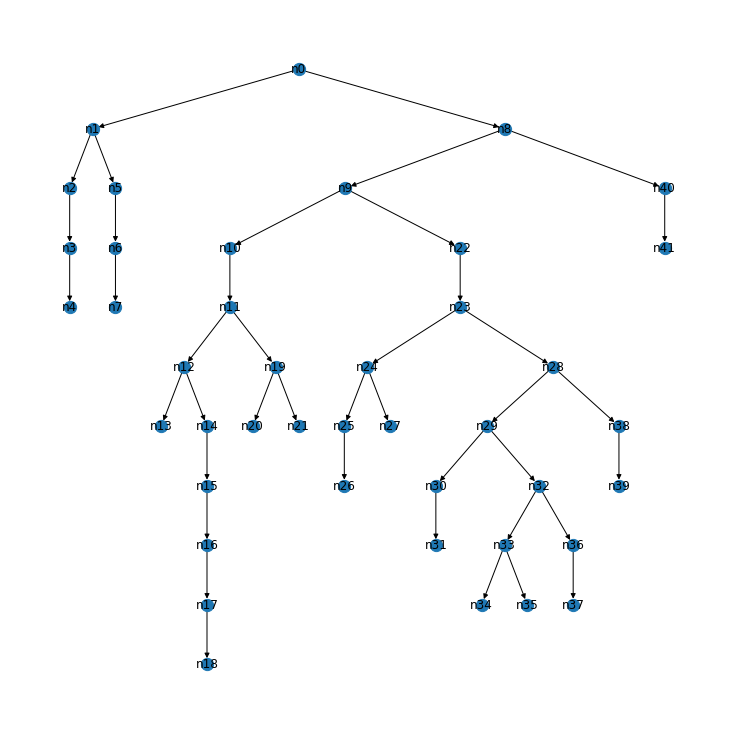

In [5]:
layered_tree_draw('trees/tree-42n.xml')